In [25]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


See here: https://cms-analysis.docs.cern.ch/guidelines/plotting/colors/ for plot styling suggestions from PubComm

## Import coffea files -- signal and background

In [26]:
prefix = './coffea/skimmed/'

suffix = '2018_SR_goodVtx_v27_NoNJet'
#suffix = '2018_NoCut_goodVtx_none_NoNJet'

In [27]:
# Signal
sig_histo_private = util.load(f'{prefix}/signal_{suffix}_private.coffea')[0]

In [28]:
# 
sig_histo_official = util.load(f'{prefix}/signal_{suffix}_official.coffea')[0]

In [29]:
sig_histo_private.keys()

dict_keys(['sel_e1_pt', 'sel_e1_eta', 'sel_e1_phi', 'sel_e1_dxy', 'sel_e1_dxySignif', 'sel_e1_vxy1', 'sel_e1_vz', 'sel_e2_pt', 'sel_e2_eta', 'sel_e2_phi', 'sel_e2_dxy', 'sel_e2_dxySignif', 'sel_e2_vxy1', 'sel_e2_vz', 'sel_e1_dxy_fromPV', 'sel_e2_dxy_fromPV', 'sel_vtx_dR', 'sel_vtx_mindxy', 'sel_vtx_vxy1', 'sel_vtx_vxy10', 'sel_vtx_vxy100', 'sel_vtx_leadpT', 'sel_vtx_METdPhi', 'sel_vtx_mindRj', 'sel_vtx_chi2', 'sel_vtx_mass', 'sel_vtx_mindPhiJ', 'sel_vtx_sign', 'sel_vtx_pt', 'sel_vtx_eta', 'sel_vtx_phi', 'sel_vtx_type', 'sel_vtx_minEleDrJ', 'sel_vtx_minEleDPhiJ', 'sel_vtx_mass_low', 'sel_vtx_mindxy_low', 'sel_vtx_sign_etaProd', 'sel_vtx_LxyCosThetaColl', 'sel_vtx_LxyCosThetaCollZoom', 'sel_vtx_LxyCosThetaCollZoomZoom', 'sel_vtx_eleDphi', 'sel_vtx_maxMiniRelIso', 'sel_vtx_maxMiniRelIsoCorr', 'sel_vtx_mass_refit', 'sel_vtx_mass_low_refit', 'sel_vtx_pt_refit', 'sel_vtx_eta_refit', 'sel_vtx_phi_refit', 'sel_vtx_dR_refit', 'sel_vtx_mass_refit_vs_sel_vtx_mass', 'sel_vtx_mass_low_refit_vs_sel_

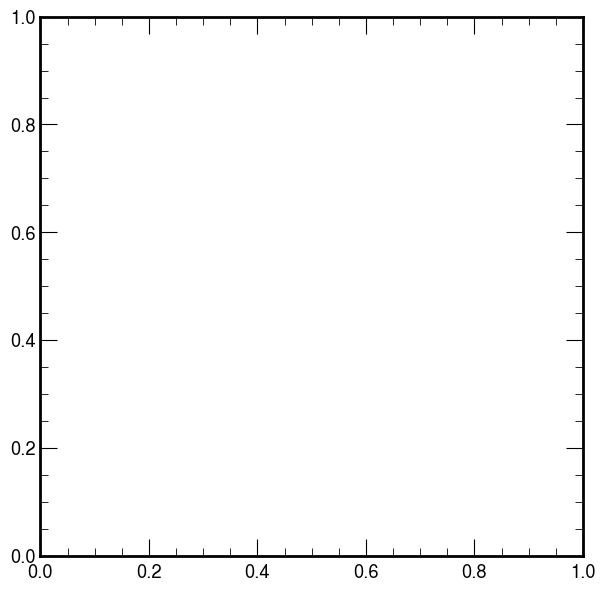

In [30]:
fig, ax = plt.subplots(figsize=(7,7))
m1 = 10; delta = 0.1; ctau = 1


In [31]:
cut = 'cut10'

In [ ]:
variable = 'bdtscore'
cut = cut

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 3j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'ylim': None,
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': True, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': f'./plots/',
    'outName': f'data_VR1_{variable}_{cut}.png',
    'color': None
}

m1 = 50; delta = 0.1; ctau = 1

style_dict['color'] = 'b'
style_dict['label'] = 'Private'
ptools.plot_signal_1D_noCMS(sig_histo_private, m1, delta, ctau, plot_dict, style_dict)

style_dict['color'] = 'c'
style_dict['label'] = 'Official'
ptools.plot_signal_1D_noCMS(sig_histo_official, m1, delta, ctau, plot_dict, style_dict)


plt.title(rf"$(m1,\Delta,c\tau)$=({m1},{delta},{ctau})")

plt.savefig(f'BDTscore_official_private_m50_delta0p1_ctau1.png', bbox_inches='tight')

In [6]:
cut = 'cut0'

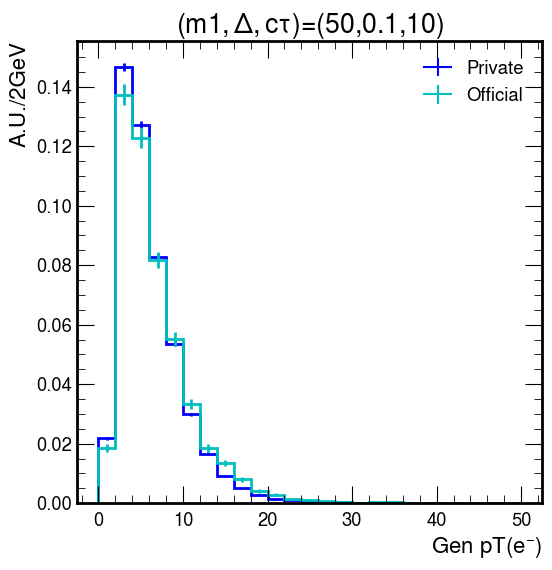

In [9]:
variable = 'genEle_pt'
cut = cut

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'ylim': None,
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': True, 
    'xlabel': r"Gen $pT(e^{-})$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'A.U./2GeV',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': f'./plots/',
    'outName': f'data_VR1_{variable}_{cut}.png',
    'color': None
}

m1 = 50; delta = 0.1; ctau = 10

style_dict['color'] = 'b'
style_dict['label'] = 'Private'
ptools.plot_signal_1D_noCMS(sig_histo_private, m1, delta, ctau, plot_dict, style_dict)

style_dict['color'] = 'c'
style_dict['label'] = 'Official'
ptools.plot_signal_1D_noCMS(sig_histo_official, m1, delta, ctau, plot_dict, style_dict)


plt.title(rf"$(m1,\Delta,c\tau)$=({m1},{delta},{ctau})")

plt.savefig(f'{variable}.png', bbox_inches='tight')

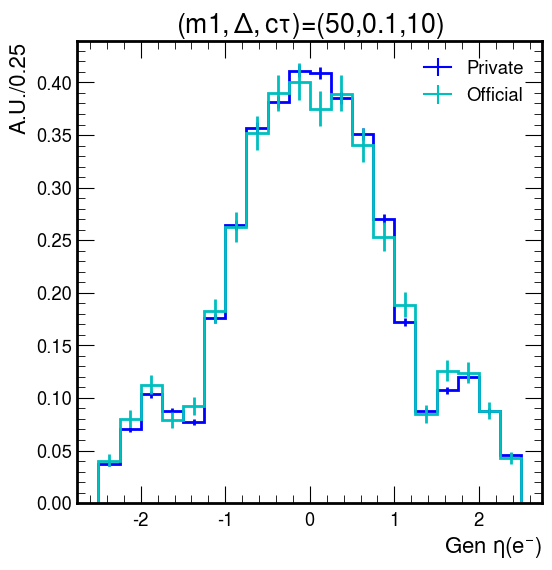

In [12]:
variable = 'genEle_eta'
cut = cut

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 5j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'ylim': None,
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': True, 
    'xlabel': r"Gen $\eta(e^{-})$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'A.U./0.25',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': f'./plots/',
    'outName': f'data_VR1_{variable}_{cut}.png',
    'color': None
}

m1 = 50; delta = 0.1; ctau = 10

style_dict['color'] = 'b'
style_dict['label'] = 'Private'
ptools.plot_signal_1D_noCMS(sig_histo_private, m1, delta, ctau, plot_dict, style_dict)

style_dict['color'] = 'c'
style_dict['label'] = 'Official'
ptools.plot_signal_1D_noCMS(sig_histo_official, m1, delta, ctau, plot_dict, style_dict)


plt.title(rf"$(m1,\Delta,c\tau)$=({m1},{delta},{ctau})")

plt.savefig(f'{variable}.png', bbox_inches='tight')

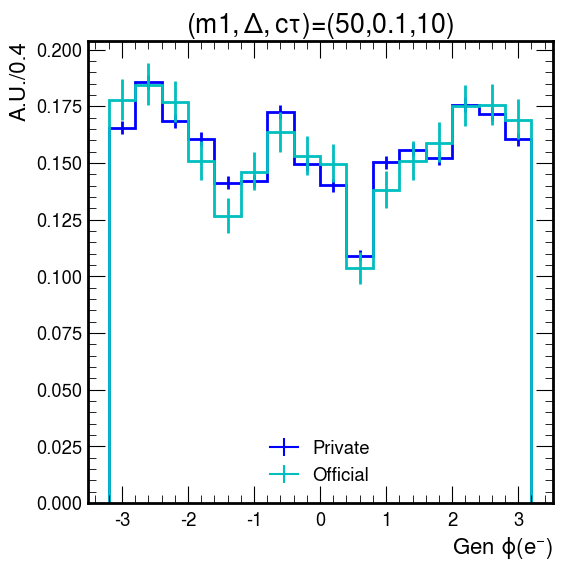

In [14]:
variable = 'genEle_phi'
cut = cut

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 4j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'ylim': None,
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': True, 
    'xlabel': r"Gen $\phi(e^{-})$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'A.U./0.4',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': f'./plots/',
    'outName': f'data_VR1_{variable}_{cut}.png',
    'color': None
}

m1 = 50; delta = 0.1; ctau = 10

style_dict['color'] = 'b'
style_dict['label'] = 'Private'
ptools.plot_signal_1D_noCMS(sig_histo_private, m1, delta, ctau, plot_dict, style_dict)

style_dict['color'] = 'c'
style_dict['label'] = 'Official'
ptools.plot_signal_1D_noCMS(sig_histo_official, m1, delta, ctau, plot_dict, style_dict)


plt.title(rf"$(m1,\Delta,c\tau)$=({m1},{delta},{ctau})")

plt.savefig(f'{variable}.png', bbox_inches='tight')

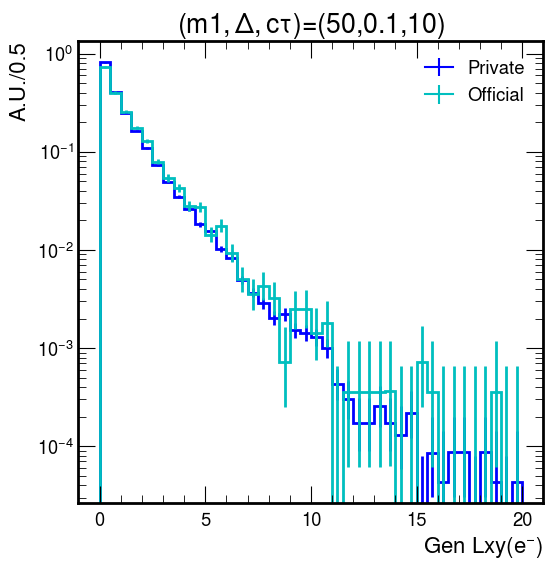

In [18]:
variable = 'genEle_vxy'
cut = cut

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 5j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'ylim': None,
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': True, 
    'xlabel': r"Gen $Lxy(e^{-})$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'A.U./0.5',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': f'./plots/',
    'outName': f'data_VR1_{variable}_{cut}.png',
    'color': None
}

m1 = 50; delta = 0.1; ctau = 10

style_dict['color'] = 'b'
style_dict['label'] = 'Private'
ptools.plot_signal_1D_noCMS(sig_histo_private, m1, delta, ctau, plot_dict, style_dict)

style_dict['color'] = 'c'
style_dict['label'] = 'Official'
ptools.plot_signal_1D_noCMS(sig_histo_official, m1, delta, ctau, plot_dict, style_dict)


plt.title(rf"$(m1,\Delta,c\tau)$=({m1},{delta},{ctau})")

plt.savefig(f'{variable}.png', bbox_inches='tight')

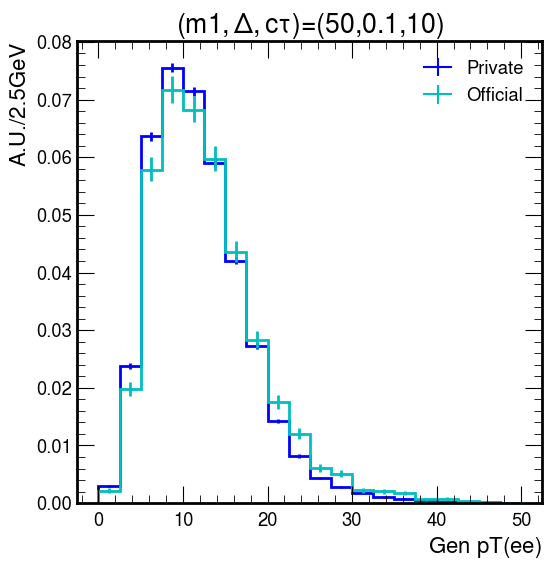

In [23]:
variable = 'genEE_pt'
cut = cut

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 5j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'ylim': None,
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': True, 
    'xlabel': r"Gen $pT(ee)$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'A.U./2.5GeV',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': f'./plots/',
    'outName': f'data_VR1_{variable}_{cut}.png',
    'color': None
}

m1 = 50; delta = 0.1; ctau = 10

style_dict['color'] = 'b'
style_dict['label'] = 'Private'
ptools.plot_signal_1D_noCMS(sig_histo_private, m1, delta, ctau, plot_dict, style_dict)

style_dict['color'] = 'c'
style_dict['label'] = 'Official'
ptools.plot_signal_1D_noCMS(sig_histo_official, m1, delta, ctau, plot_dict, style_dict)


plt.title(rf"$(m1,\Delta,c\tau)$=({m1},{delta},{ctau})")

plt.savefig(f'{variable}.png', bbox_inches='tight')

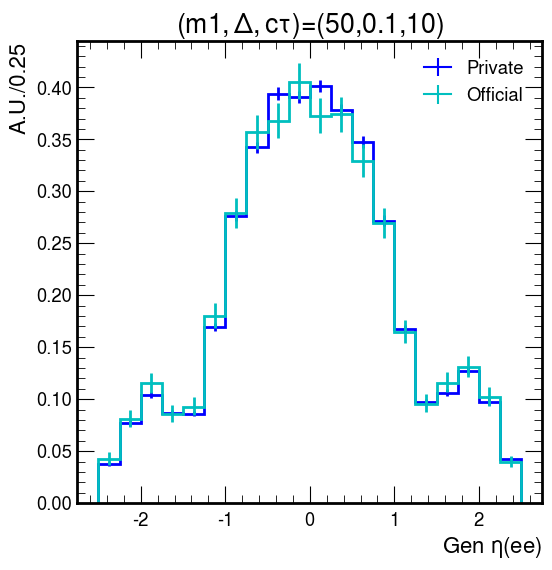

In [25]:
variable = 'genEE_eta'
cut = cut

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 5j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'ylim': None,
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': True, 
    'xlabel': r"Gen $\eta(ee)$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'A.U./0.25',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': f'./plots/',
    'outName': f'data_VR1_{variable}_{cut}.png',
    'color': None
}

m1 = 50; delta = 0.1; ctau = 10

style_dict['color'] = 'b'
style_dict['label'] = 'Private'
ptools.plot_signal_1D_noCMS(sig_histo_private, m1, delta, ctau, plot_dict, style_dict)

style_dict['color'] = 'c'
style_dict['label'] = 'Official'
ptools.plot_signal_1D_noCMS(sig_histo_official, m1, delta, ctau, plot_dict, style_dict)


plt.title(rf"$(m1,\Delta,c\tau)$=({m1},{delta},{ctau})")

plt.savefig(f'{variable}.png', bbox_inches='tight')

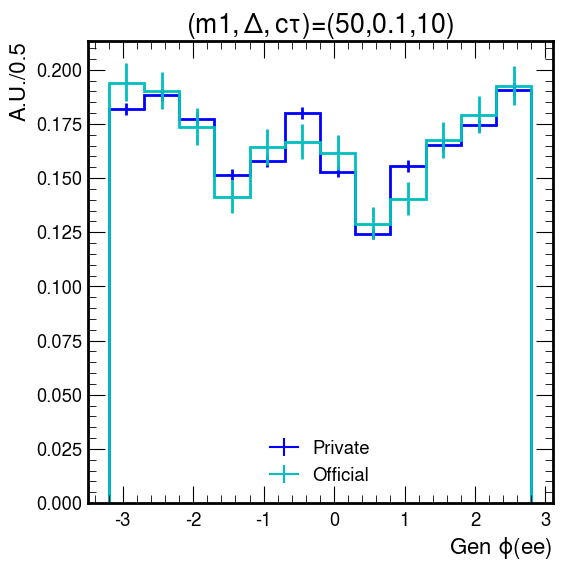

In [29]:
variable = 'genEE_phi'
cut = cut

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 5j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'ylim': None,
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': True, 
    'xlabel': r"Gen $\phi(ee)$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'A.U./0.5',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': f'./plots/',
    'outName': f'data_VR1_{variable}_{cut}.png',
    'color': None
}

m1 = 50; delta = 0.1; ctau = 10

style_dict['color'] = 'b'
style_dict['label'] = 'Private'
ptools.plot_signal_1D_noCMS(sig_histo_private, m1, delta, ctau, plot_dict, style_dict)

style_dict['color'] = 'c'
style_dict['label'] = 'Official'
ptools.plot_signal_1D_noCMS(sig_histo_official, m1, delta, ctau, plot_dict, style_dict)


plt.title(rf"$(m1,\Delta,c\tau)$=({m1},{delta},{ctau})")

plt.savefig(f'{variable}.png', bbox_inches='tight')

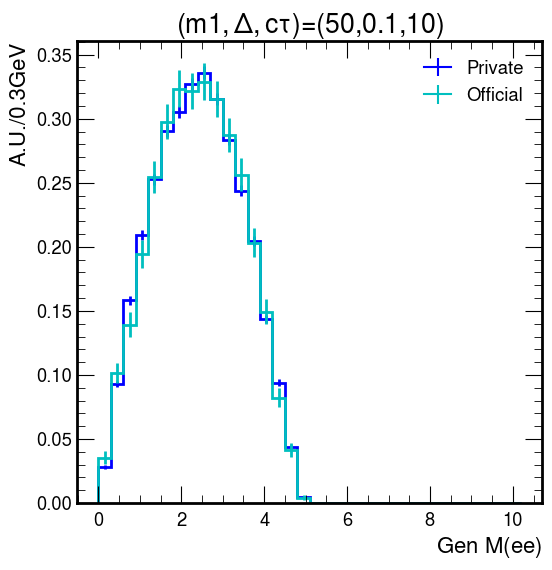

In [32]:
variable = 'genEE_mass'
cut = cut

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': [0,10],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'ylim': None,
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': True, 
    'xlabel': r"Gen $M(ee)$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'A.U./0.3GeV',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': f'./plots/',
    'outName': f'data_VR1_{variable}_{cut}.png',
    'color': None
}

m1 = 50; delta = 0.1; ctau = 10

style_dict['color'] = 'b'
style_dict['label'] = 'Private'
ptools.plot_signal_1D_noCMS(sig_histo_private, m1, delta, ctau, plot_dict, style_dict)

style_dict['color'] = 'c'
style_dict['label'] = 'Official'
ptools.plot_signal_1D_noCMS(sig_histo_official, m1, delta, ctau, plot_dict, style_dict)


plt.title(rf"$(m1,\Delta,c\tau)$=({m1},{delta},{ctau})")

plt.savefig(f'{variable}.png', bbox_inches='tight')

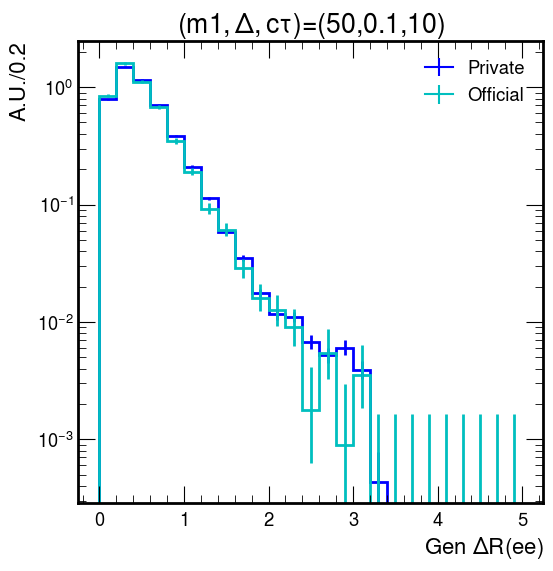

In [35]:
variable = 'genEE_dR'
cut = cut

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 4j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'ylim': None,
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': True, 
    'xlabel': r"Gen $\Delta R(ee)$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'A.U./0.2',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': f'./plots/',
    'outName': f'data_VR1_{variable}_{cut}.png',
    'color': None
}

m1 = 50; delta = 0.1; ctau = 10

style_dict['color'] = 'b'
style_dict['label'] = 'Private'
ptools.plot_signal_1D_noCMS(sig_histo_private, m1, delta, ctau, plot_dict, style_dict)

style_dict['color'] = 'c'
style_dict['label'] = 'Official'
ptools.plot_signal_1D_noCMS(sig_histo_official, m1, delta, ctau, plot_dict, style_dict)


plt.title(rf"$(m1,\Delta,c\tau)$=({m1},{delta},{ctau})")

plt.savefig(f'{variable}.png', bbox_inches='tight')

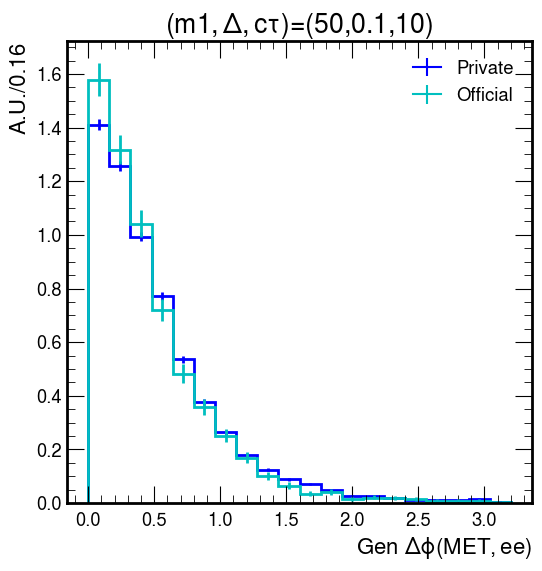

In [45]:
variable = 'genEE_METdPhi'
cut = cut

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 5j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'ylim': None,
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': True, 
    'xlabel': r"Gen $\Delta \phi(MET, ee)$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'A.U./0.16',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': f'./plots/',
    'outName': f'data_VR1_{variable}_{cut}.png',
    'color': None
}

m1 = 50; delta = 0.1; ctau = 10

style_dict['color'] = 'b'
style_dict['label'] = 'Private'
ptools.plot_signal_1D_noCMS(sig_histo_private, m1, delta, ctau, plot_dict, style_dict)

style_dict['color'] = 'c'
style_dict['label'] = 'Official'
ptools.plot_signal_1D_noCMS(sig_histo_official, m1, delta, ctau, plot_dict, style_dict)


plt.title(rf"$(m1,\Delta,c\tau)$=({m1},{delta},{ctau})")

plt.savefig(f'{variable}.png', bbox_inches='tight')

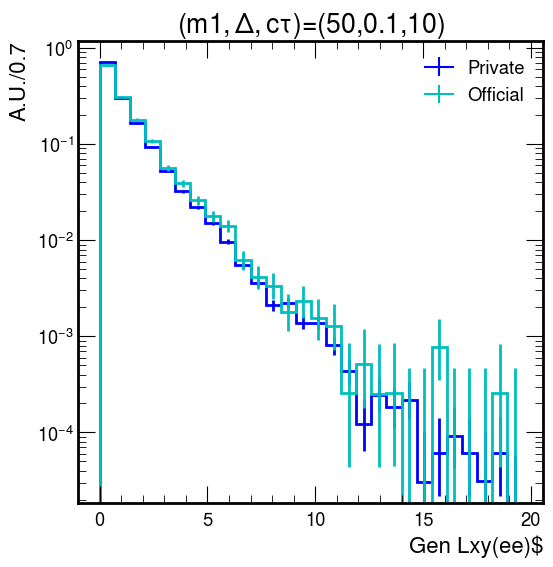

In [50]:
variable = 'genEE_vxy'
cut = cut

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 7j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'ylim': None,
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': True, 
    'xlabel': r"Gen Lxy(ee)$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'A.U./0.7',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': f'./plots/',
    'outName': f'data_VR1_{variable}_{cut}.png',
    'color': None
}

m1 = 50; delta = 0.1; ctau = 10

style_dict['color'] = 'b'
style_dict['label'] = 'Private'
ptools.plot_signal_1D_noCMS(sig_histo_private, m1, delta, ctau, plot_dict, style_dict)

style_dict['color'] = 'c'
style_dict['label'] = 'Official'
ptools.plot_signal_1D_noCMS(sig_histo_official, m1, delta, ctau, plot_dict, style_dict)


plt.title(rf"$(m1,\Delta,c\tau)$=({m1},{delta},{ctau})")

plt.savefig(f'{variable}.png', bbox_inches='tight')

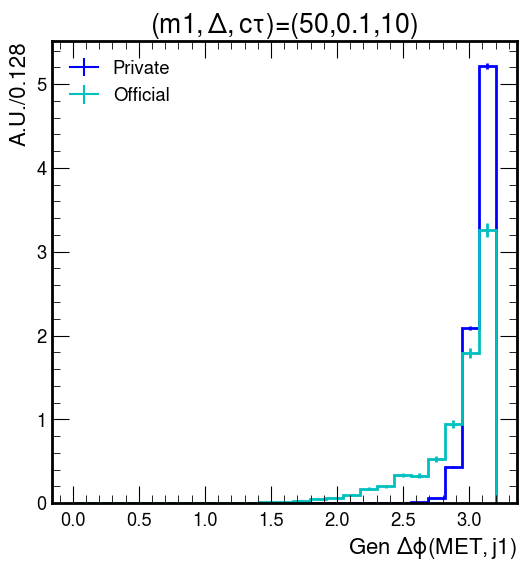

In [54]:
variable = 'gen_JetMETdPhi_lead'
cut = cut

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 4j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'ylim': None,
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': True, 
    'xlabel': r"Gen $\Delta\phi(MET, j1)$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': f'./plots/',
    'outName': f'data_VR1_{variable}_{cut}.png',
    'color': None
}

m1 = 50; delta = 0.1; ctau = 10

style_dict['color'] = 'b'
style_dict['label'] = 'Private'
ptools.plot_signal_1D_noCMS(sig_histo_private, m1, delta, ctau, plot_dict, style_dict)

style_dict['color'] = 'c'
style_dict['label'] = 'Official'
ptools.plot_signal_1D_noCMS(sig_histo_official, m1, delta, ctau, plot_dict, style_dict)


plt.title(rf"$(m1,\Delta,c\tau)$=({m1},{delta},{ctau})")

plt.savefig(f'{variable}.png', bbox_inches='tight')

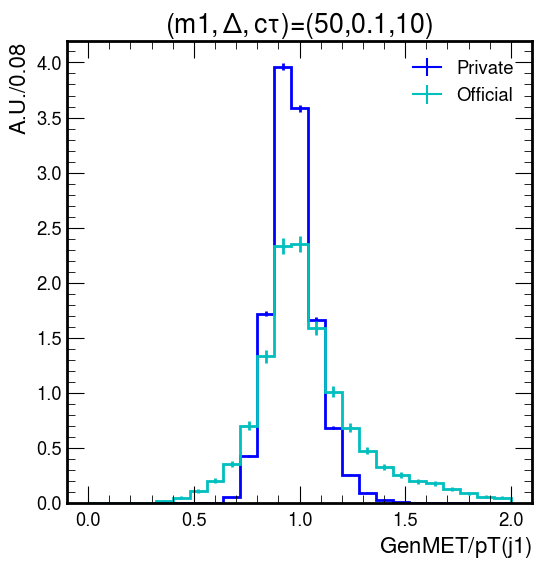

In [57]:
variable = 'gen_jetMETratio_lead'
cut = cut

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 4j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'ylim': None,
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': True, 
    'xlabel': r"$Gen MET/pT(j1)$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'A.U./0.08',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': f'./plots/',
    'outName': f'data_VR1_{variable}_{cut}.png',
    'color': None
}

m1 = 50; delta = 0.1; ctau = 10

style_dict['color'] = 'b'
style_dict['label'] = 'Private'
ptools.plot_signal_1D_noCMS(sig_histo_private, m1, delta, ctau, plot_dict, style_dict)

style_dict['color'] = 'c'
style_dict['label'] = 'Official'
ptools.plot_signal_1D_noCMS(sig_histo_official, m1, delta, ctau, plot_dict, style_dict)


plt.title(rf"$(m1,\Delta,c\tau)$=({m1},{delta},{ctau})")

plt.savefig(f'{variable}.png', bbox_inches='tight')

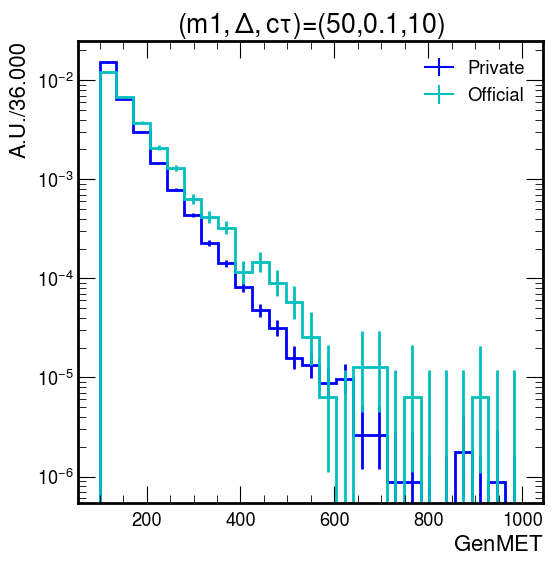

In [61]:
variable = 'genLeadMETPt'
cut = cut

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 4j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'ylim': None,
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': True, 
    'xlabel': r"$Gen MET$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': f'./plots/',
    'outName': f'data_VR1_{variable}_{cut}.png',
    'color': None
}

m1 = 50; delta = 0.1; ctau = 10

style_dict['color'] = 'b'
style_dict['label'] = 'Private'
ptools.plot_signal_1D_noCMS(sig_histo_private, m1, delta, ctau, plot_dict, style_dict)

style_dict['color'] = 'c'
style_dict['label'] = 'Official'
ptools.plot_signal_1D_noCMS(sig_histo_official, m1, delta, ctau, plot_dict, style_dict)


plt.title(rf"$(m1,\Delta,c\tau)$=({m1},{delta},{ctau})")

plt.savefig(f'{variable}.png', bbox_inches='tight')

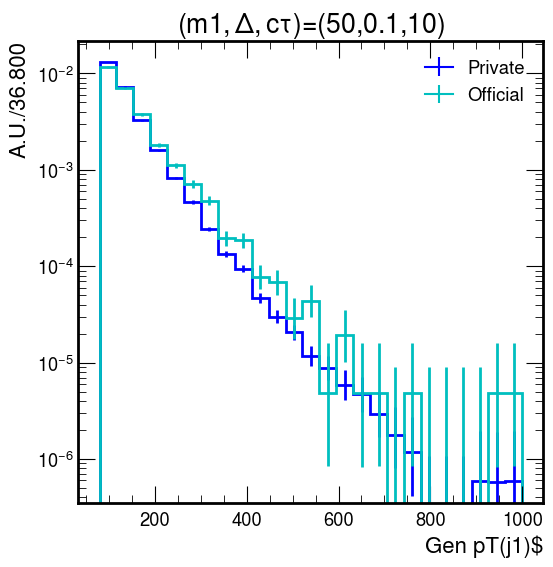

In [64]:
variable = 'genJetPt_lead'
cut = cut

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 4j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'ylim': None,
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': True, 
    'xlabel': r"Gen pT(j1)$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': f'./plots/',
    'outName': f'data_VR1_{variable}_{cut}.png',
    'color': None
}

m1 = 50; delta = 0.1; ctau = 10

style_dict['color'] = 'b'
style_dict['label'] = 'Private'
ptools.plot_signal_1D_noCMS(sig_histo_private, m1, delta, ctau, plot_dict, style_dict)

style_dict['color'] = 'c'
style_dict['label'] = 'Official'
ptools.plot_signal_1D_noCMS(sig_histo_official, m1, delta, ctau, plot_dict, style_dict)


plt.title(rf"$(m1,\Delta,c\tau)$=({m1},{delta},{ctau})")

plt.savefig(f'{variable}.png', bbox_inches='tight')

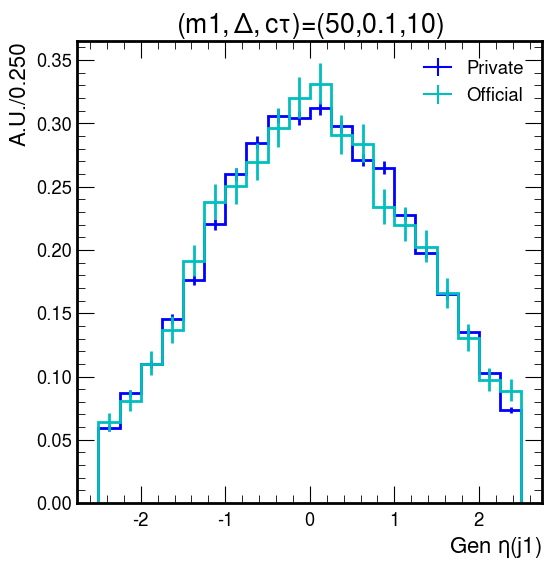

In [67]:
variable = 'genJetEta_lead'
cut = cut

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 5j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'ylim': None,
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': True, 
    'xlabel': r"Gen $\eta(j1)$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': f'./plots/',
    'outName': f'data_VR1_{variable}_{cut}.png',
    'color': None
}

m1 = 50; delta = 0.1; ctau = 10

style_dict['color'] = 'b'
style_dict['label'] = 'Private'
ptools.plot_signal_1D_noCMS(sig_histo_private, m1, delta, ctau, plot_dict, style_dict)

style_dict['color'] = 'c'
style_dict['label'] = 'Official'
ptools.plot_signal_1D_noCMS(sig_histo_official, m1, delta, ctau, plot_dict, style_dict)


plt.title(rf"$(m1,\Delta,c\tau)$=({m1},{delta},{ctau})")

plt.savefig(f'{variable}.png', bbox_inches='tight')

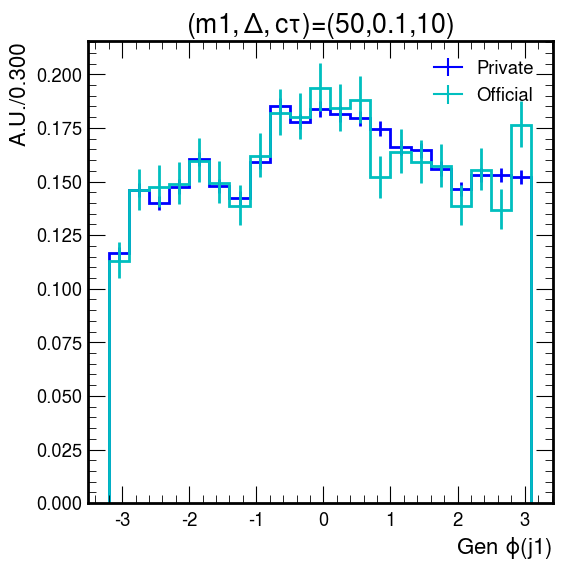

In [68]:
variable = 'genJetPhi_lead'
cut = cut

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 3j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'ylim': None,
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': True, 
    'xlabel': r"Gen $\phi(j1)$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': f'./plots/',
    'outName': f'data_VR1_{variable}_{cut}.png',
    'color': None
}

m1 = 50; delta = 0.1; ctau = 10

style_dict['color'] = 'b'
style_dict['label'] = 'Private'
ptools.plot_signal_1D_noCMS(sig_histo_private, m1, delta, ctau, plot_dict, style_dict)

style_dict['color'] = 'c'
style_dict['label'] = 'Official'
ptools.plot_signal_1D_noCMS(sig_histo_official, m1, delta, ctau, plot_dict, style_dict)


plt.title(rf"$(m1,\Delta,c\tau)$=({m1},{delta},{ctau})")

plt.savefig(f'{variable}.png', bbox_inches='tight')

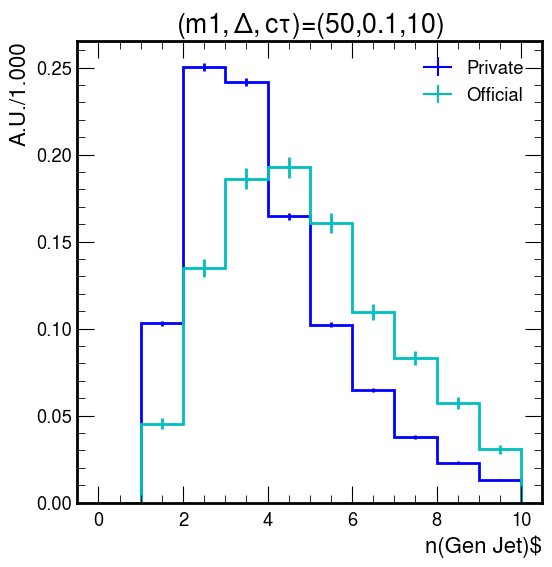

In [69]:
variable = 'nGenJet_all'
cut = cut

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'ylim': None,
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': True, 
    'xlabel': r"n(Gen Jet)$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': f'./plots/',
    'outName': f'data_VR1_{variable}_{cut}.png',
    'color': None
}

m1 = 50; delta = 0.1; ctau = 10

style_dict['color'] = 'b'
style_dict['label'] = 'Private'
ptools.plot_signal_1D_noCMS(sig_histo_private, m1, delta, ctau, plot_dict, style_dict)

style_dict['color'] = 'c'
style_dict['label'] = 'Official'
ptools.plot_signal_1D_noCMS(sig_histo_official, m1, delta, ctau, plot_dict, style_dict)


plt.title(rf"$(m1,\Delta,c\tau)$=({m1},{delta},{ctau})")

plt.savefig(f'{variable}.png', bbox_inches='tight')

In [ ]:
variable = 'nGenJet_30'
cut = cut

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'ylim': None,
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': True, 
    'xlabel': r"n(Gen Jet; pT > 30)$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': f'./plots/',
    'outName': f'data_VR1_{variable}_{cut}.png',
    'color': None
}

m1 = 50; delta = 0.1; ctau = 10

style_dict['color'] = 'b'
style_dict['label'] = 'Private'
ptools.plot_signal_1D_noCMS(sig_histo_private, m1, delta, ctau, plot_dict, style_dict)

style_dict['color'] = 'c'
style_dict['label'] = 'Official'
ptools.plot_signal_1D_noCMS(sig_histo_official, m1, delta, ctau, plot_dict, style_dict)


plt.title(rf"$(m1,\Delta,c\tau)$=({m1},{delta},{ctau})")

plt.savefig(f'{variable}.png', bbox_inches='tight')

Text(0.5, 1.0, '$(m1,\\Delta,c\\tau)$=(50,0.1,10)')

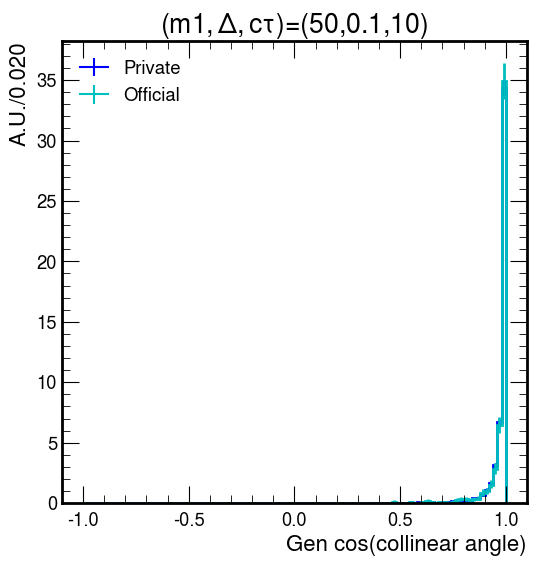

In [91]:
variable = 'sel_vtx_GenCosThetaColl'
cut = cut

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'ylim': None,
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': True, 
    'xlabel': "Gen cos(collinear angle)",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': f'./plots/',
    'outName': f'data_VR1_{variable}_{cut}.png',
    'color': None
}

m1 = 50; delta = 0.1; ctau = 10

style_dict['color'] = 'b'
style_dict['label'] = 'Private'
ptools.plot_signal_1D_noCMS(sig_histo_private, m1, delta, ctau, plot_dict, style_dict)

style_dict['color'] = 'c'
style_dict['label'] = 'Official'
ptools.plot_signal_1D_noCMS(sig_histo_official, m1, delta, ctau, plot_dict, style_dict)


plt.title(rf"$(m1,\Delta,c\tau)$=({m1},{delta},{ctau})")

Text(0.5, 1.0, '$(m1,\\Delta,c\\tau)$=(50,0.1,10)')

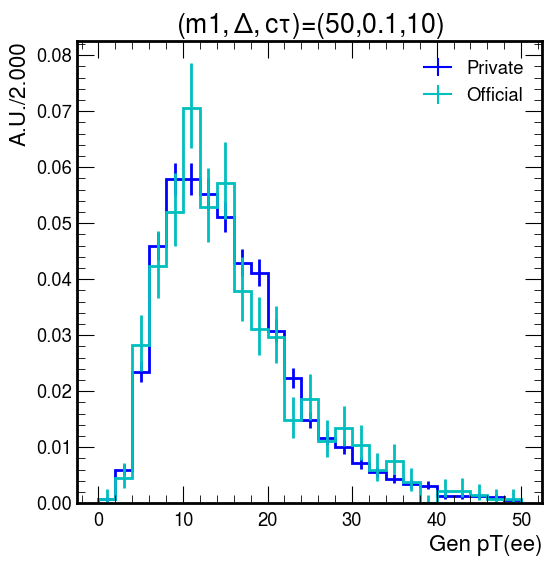

In [25]:
variable = 'genEE_pt'
cut = 'cut10'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 4j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'ylim': None,
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': True, 
    'xlabel': "Gen pT(ee)",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': f'./plots/',
    'outName': f'data_VR1_{variable}_{cut}.png',
    'color': None
}

m1 = 50; delta = 0.1; ctau = 10

style_dict['color'] = 'b'
style_dict['label'] = 'Private'
ptools.plot_signal_1D_noCMS(sig_histo_private, m1, delta, ctau, plot_dict, style_dict)

style_dict['color'] = 'c'
style_dict['label'] = 'Official'
ptools.plot_signal_1D_noCMS(sig_histo_official, m1, delta, ctau, plot_dict, style_dict)


plt.title(rf"$(m1,\Delta,c\tau)$=({m1},{delta},{ctau})")